# Task 2: Develop Time Series Forecasting Models

In [1]:
# import libraries and and configurations
import sys, os
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_processing
import forecasting

2025-08-14 15:45:15.024741: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-14 15:45:15.029573: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-14 15:45:15.042392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755175515.066848   18291 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755175515.073613   18291 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755175515.090478   18291 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

#### Loading the data

In [2]:
# Load the data
df = pd.read_csv("../data/TSLA.csv", parse_dates=["Date"], index_col="Date")
# Display the first few rows of the dataframe
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-07-01,18.073999,18.174667,17.856667,17.943333,31518000
2015-07-02,18.680000,18.830000,18.220667,18.667999,107458500
2015-07-06,18.591999,18.779333,18.420000,18.648001,61828500
2015-07-07,18.333332,18.346666,17.384666,17.858667,91576500
2015-07-08,17.288000,17.386667,16.954000,16.997334,93316500


#### Preprocessing the data
- Fill missing values
- Normalize the data

In [3]:
importlib.reload(data_processing)
from data_processing import clean_and_normalize

In [4]:
clean_df = clean_and_normalize(df)
# Display the number of missing values in each column
missing_values = clean_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/data_processing.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='ffill', inplace=True)
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/data_processing.py:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[c

#### Splitting the data into training and testing sets

In [5]:
from forecasting import chronological_split

2015-07-01 00:00:00 -> 2023-12-29 00:00:00 | Train size: 2140
2024-01-02 00:00:00 -> 2025-07-30 00:00:00 | Test size: 395


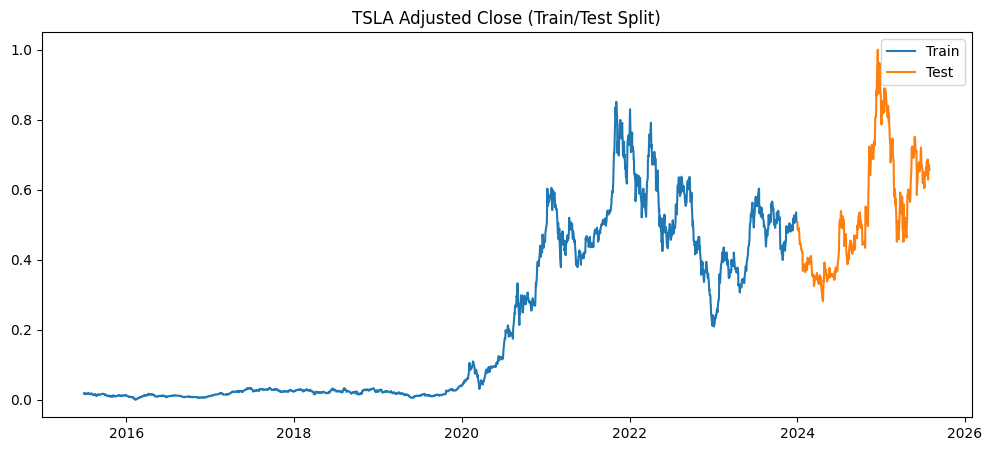

In [6]:
tsla = clean_df.sort_index()
SPLIT_DATE = "2023-12-31"
y = tsla["Close"].astype(float)

y_train, y_test = chronological_split(y, split_date=SPLIT_DATE)
print(y_train.index.min(), "->", y_train.index.max(), "| Train size:", len(y_train))
print(y_test.index.min(),  "->", y_test.index.max(),  "| Test size:", len(y_test))

plt.figure(figsize=(12,5))
plt.plot(y_train, label="Train")
plt.plot(y_test, label="Test")
plt.title("TSLA Adjusted Close (Train/Test Split)")
plt.legend(); plt.show()

#### ARIMA: Auto-fit, Forecast, Metrics

In [7]:
# load the modules
importlib.reload(data_processing)
from forecasting import (fit_arima, forecast_arima, plot_arima)

/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

ARIMA model saved to ../model/arima_model.pkl
ARIMA metrics: {'MAE': 0.13389406628659778, 'RMSE': np.float64(0.165827416139461), 'MAPE': np.float64(25.121380419935047)}


/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


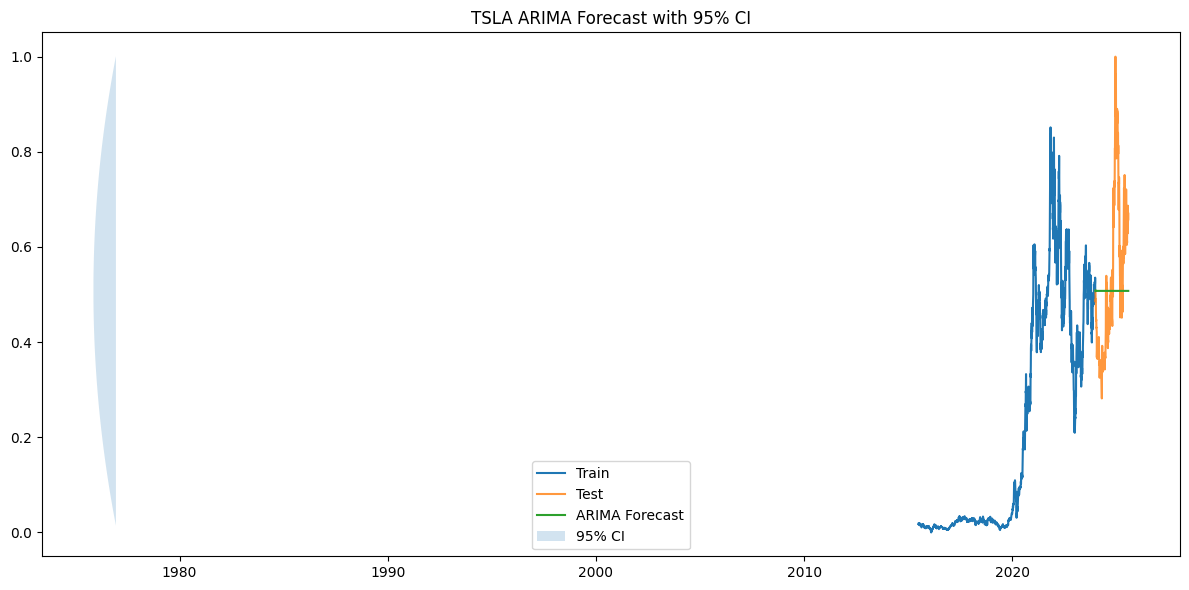

In [8]:
arima_model = fit_arima(y_train, order=(5,1,2))
arima_res = forecast_arima(arima_model, y_test)

print("ARIMA metrics:", arima_res.metrics)
plot_arima(y_train, y_test, arima_res, title="TSLA ARIMA Forecast with 95% CI")

#### LSTM: Train & Predict, Metrics

In [9]:
# load the modules
importlib.reload(data_processing)
from forecasting import (train_predict_lstm, plot_lstm)


2025-08-14 15:45:21.346301: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM model saved to ../model/lstm_tsla.h5
LSTM scaler saved to ../model/lstm_scaler.save
LSTM metrics: {'MAE': 0.02321878302588655, 'RMSE': np.float64(0.032175810320075784), 'MAPE': np.float64(5.006654273889244)}


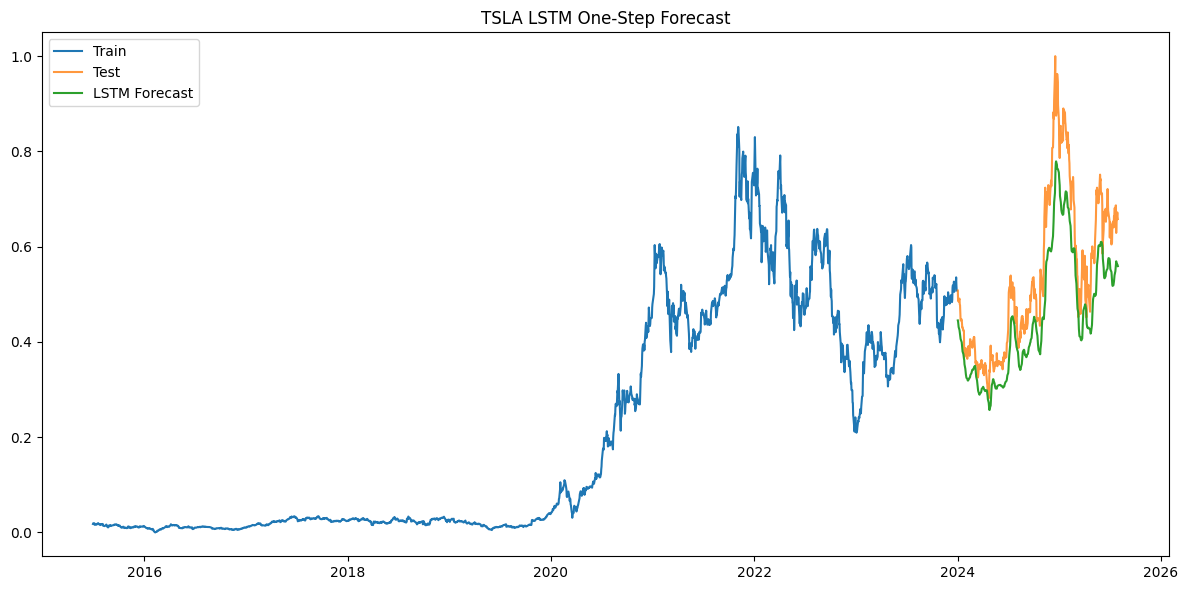

In [10]:
# fitting the LSTM model and making predictions
lstm_res = train_predict_lstm(
    y_full=y, 
    split_date=SPLIT_DATE,
    lookback=60, 
    epochs=30, 
    batch_size=32,
    units=64, 
    dropout=0.2, 
    lr=1e-3,
    val_split=0.1, 
    seed=42,
    save_model=True,
    model_path="../model/lstm_tsla.h5",
    scaler_path="../model/lstm_scaler.save"
)

print("LSTM metrics:", lstm_res.metrics)
plot_lstm(y_train, y_test, lstm_res, title="TSLA LSTM One-Step Forecast")


#### Compare the models

In [11]:
# Load the funtion to compare the models
importlib.reload(forecasting)
from forecasting import evaluate_forecast

            MAE      RMSE       MAPE
ARIMA  0.133894  0.165827  25.121380
LSTM   0.084742  0.097025  15.163295


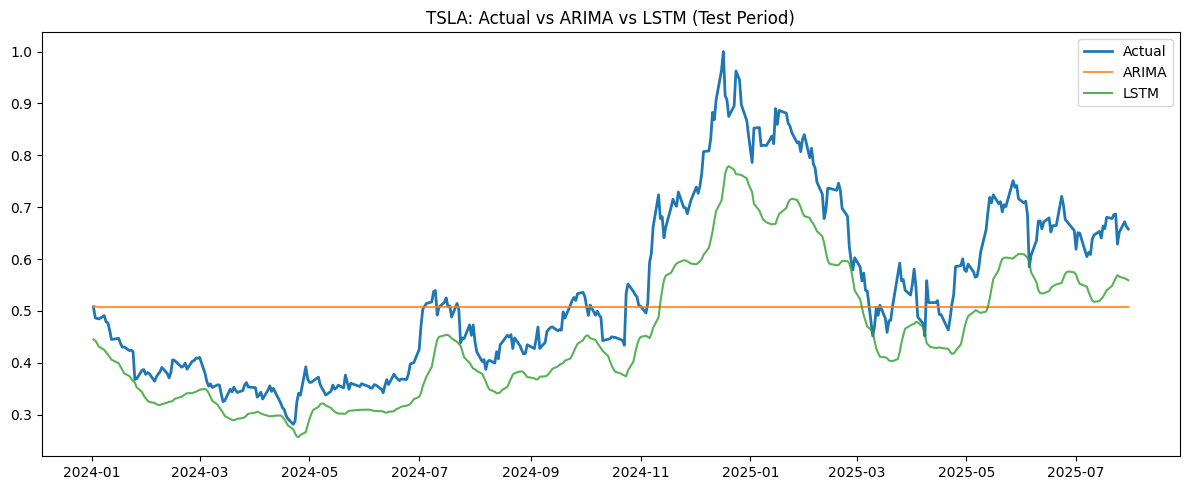

In [12]:
# Align predictions to test index (ARIMA already aligned; LSTM aligned by its own test target dates)
common_idx = y_test.index.intersection(lstm_res.preds.index).intersection(arima_res.preds.index)

metrics_arima = evaluate_forecast(y_test.loc[common_idx], arima_res.preds.loc[common_idx])
metrics_lstm  = evaluate_forecast(y_test.loc[common_idx], lstm_res.preds.loc[common_idx])

summary = pd.DataFrame([metrics_arima, metrics_lstm], index=["ARIMA", "LSTM"])
print(summary)

# Quick visual comparison
plt.figure(figsize=(12,5))
plt.plot(y_test.loc[common_idx], label="Actual", linewidth=2)
plt.plot(arima_res.preds.loc[common_idx], label="ARIMA", alpha=0.8)
plt.plot(lstm_res.preds.loc[common_idx], label="LSTM", alpha=0.8)
plt.title("TSLA: Actual vs ARIMA vs LSTM (Test Period)")
plt.legend(); plt.tight_layout(); plt.show()
